In [246]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from scipy.optimize import fixed_point

In [3]:
import seaborn as sns

In [4]:
from scipy.special import binom

In [169]:
from primesieve import *

# Sequential updates

In [7]:
def fully_con_seq(beta, N, tmax):
    dt=np.exp(-beta)
    s=2*(np.random.rand(N)>0.5)-1
    mat_S_seq=[s]
    for t in range(tmax):
        for n in range(N):
            n0=np.random.randint(N)
            p=np.random.rand()
            if p<np.exp(-s[n0]*beta*np.sum(s)/N)*dt:
                s[n0]=-s[n0]

        mat_S_seq.append(s.copy())
    mat_S_seq=np.array(mat_S_seq)

    return(np.mean(np.mean(mat_S_seq, axis=1)[500:]), np.std(np.mean(mat_S_seq, axis=1)[500:]))

In [838]:
N=501
tmax=2000
beta=1.5
dt=np.exp(-beta)

In [839]:
s=2*(np.random.rand(N)>0.5)-1
print(np.sum(s))
mat_S_seq=[s]
for t in range(tmax):
    for n in range(N):
        n0=np.random.randint(N)
        p=np.random.rand()
        if p<np.exp(-s[n0]*beta*np.sum(s)/N)*dt:
            s[n0]=-s[n0]
            
    mat_S_seq.append(s.copy())
mat_S_seq=np.array(mat_S_seq)

11


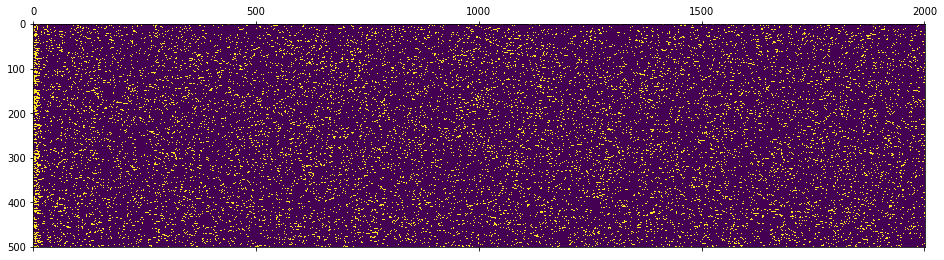

In [840]:
plt.matshow(mat_S_seq.T)

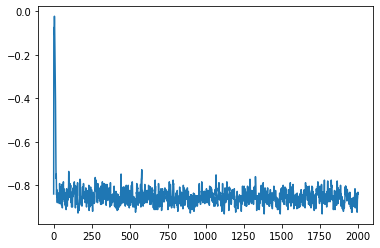

In [841]:
mt_seq=np.mean(mat_S_seq, axis=1)
plt.plot(mt_seq)

In [845]:
np.mean(mt_seq[-1000:])

-0.8562075848303392

In [846]:
np.std(mt_seq[-1000:])

0.029101111897083233

In [844]:
fixed_point(lambda x: np.tanh(beta*x), x0=0.5)

array(0.85855964)

# Parallel updates

In [32]:
def fully_con_par(beta, N, tmax):
    dt=np.exp(-2*beta)
    s=2*(np.random.rand(N)>0.5)-1
    mat_S_par=[s]
    for t in range(tmax):
        p=np.random.rand(N)
        s0=s.copy()
        M=np.sum(s0)
        s=s0*(2*(p>np.exp(-s0*beta*M/N)*dt)-1)
        mat_S_par.append(s.copy())
    return(np.mean(np.mean(mat_S_par, axis=1)[500:]), np.std(np.mean(mat_S_par, axis=1)[500:]))

In [826]:
N=501
tmax=2000
beta=1.5
dt=np.exp(-beta)

In [827]:
s=2*(np.random.rand(N)>0.5)-1

In [828]:
mat_S_par=[s]
for t in range(tmax):
    p=np.random.rand(N)
    s0=s.copy()
    M=np.sum(s0)
    s=s0*(2*(p>np.exp(-s0*beta*M/N)*dt)-1)
    mat_S_par.append(s.copy())
mat_S_par=np.array(mat_S_par)

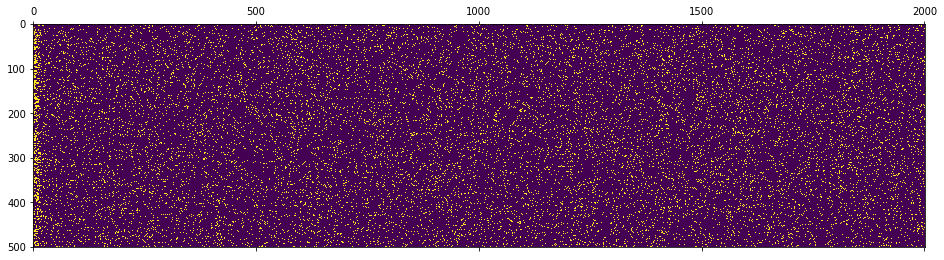

In [829]:
plt.matshow(mat_S_par.T)

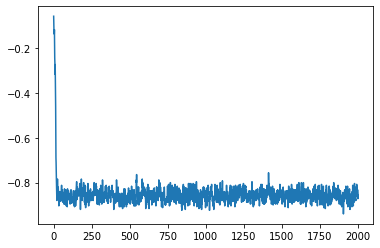

In [830]:
mt_par=np.mean(mat_S_par, axis=1)
plt.plot(mt_par, '-')

In [847]:
np.mean(mt_par[-1000:])

-0.8571656686626745

In [848]:
np.std(mt_par[-1000:])

0.02429613201044974

In [92]:
fixed_point(lambda x: np.tanh(2*x), x0=0.5)

array(0.95750402)

In [866]:
list_beta=np.linspace(0, 4, 50)
list_m0_par=[]
list_m0_seq=[]

for beta in list_beta:
    list_m0_par.append(np.abs(fully_con_par(beta, 50, 2000)))
    list_m0_seq.append(np.abs(fully_con_seq(beta, 50, 2000)))

In [867]:
list_th_m0=[]
for beta in list_beta:
    list_th_m0.append(fixed_point(lambda x: np.tanh(beta*x), x0=0.5))

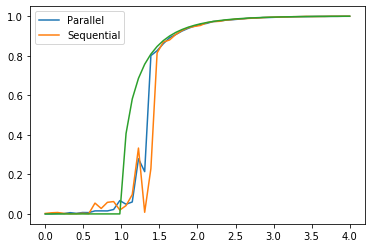

In [868]:
plt.plot(list_beta, list_m0_par, label='Parallel')
plt.plot(list_beta, list_m0_seq, label='Sequential')
plt.legend()
plt.plot(list_beta, list_th_m0)

# compare distribs

In [36]:
m_par, std_par = {}, {}
m_seq, std_seq = {}, {}

list_N=[50, 100, 200, 500, 1000]
for N in list_N:
    m_par[N], std_par[N] = fully_con_par(beta=2, N=N, tmax=10000)
    m_seq[N], std_seq[N] = fully_con_seq(beta=2, N=N, tmax=10000)

(0.95, 0.96)

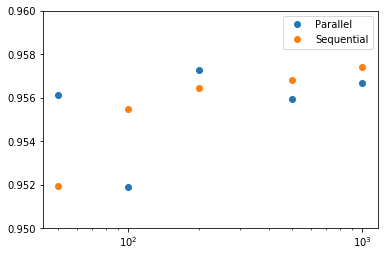

In [37]:
plt.plot(list_N, [np.abs(m_par[N]) for N in list_N], 'o', label='Parallel')
plt.semilogx(list_N, [np.abs(m_seq[N]) for N in list_N], 'o', label='Sequential')
plt.legend()
plt.ylim(0.95,0.96)

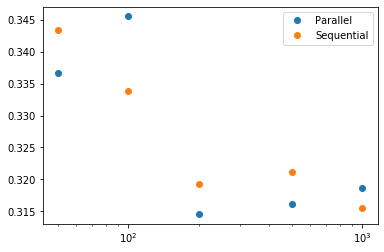

In [38]:
plt.plot(list_N, [std_par[N]*np.sqrt(N) for N in list_N], 'o', label='Parallel')
plt.semilogx(list_N, [(std_seq[N])*np.sqrt(N) for N in list_N], 'o', label='Sequential')
plt.legend()
#plt.ylim(0,0.1)

# RNG decimals impact

In [428]:
def run_para_dec(beta, N, tmax, dec):
    dt=np.exp(-2*beta)
    s=2*(np.random.rand(N)>0.5)-1
    mat_S_par=[s]
    for t in range(tmax):
        p=np.round(np.random.rand(N), decimals=dec)
        s0=s.copy()
        M=np.sum(s0)
        s=s0*(2*(p>np.exp(-s0*beta*M/N)*dt)-1)
        mat_S_par.append(s.copy())
    mt=np.mean(mat_S_par, axis=1)
    mS=mt[500:-1]
    L=mS.shape[0]
    d=2000
    return(np.mean(np.mean(mat_S_par, axis=1)[500:]), \
           np.std(np.mean(mat_S_par, axis=1)[500:-1:100]), \
           np.std(np.std(mS[:np.int64(L/d)*d].reshape(np.int64(L/d), d), axis=1))/np.sqrt(np.int64(L/d)))

In [429]:
list_beta=np.linspace(0, 4, 50)
dict_m0_dec=[]
dict_std0_dec=[]
dict_errstd_dec=[]

for dec in range(1,15):
    m0, std0, errstd = run_para_dec(beta=2, N=50, tmax=100000, dec=dec)
    dict_m0_dec.append(np.abs(m0))
    dict_std0_dec.append(std0)
    dict_errstd_dec.append(errstd)

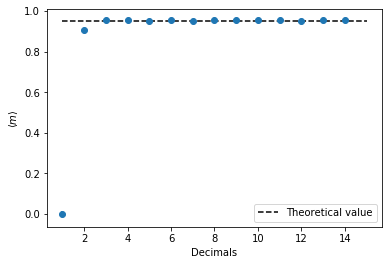

In [430]:
plt.errorbar(range(1,15), dict_m0_dec, yerr=dict_std0_dec/np.sqrt(95), fmt='o')
plt.hlines(0.952442, 1, 15, ls='--', label='Theoretical value')
plt.xlabel('Decimals')
plt.ylabel(r'$\langle m \rangle$')
plt.legend(loc=4)
#plt.plot(range(1,10), dict_std0_dec, 'o')

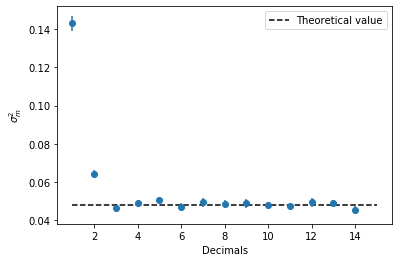

In [433]:
plt.errorbar(range(1,15), dict_std0_dec, yerr=[3*r for r in dict_errstd_dec], fmt='o')
plt.hlines(0.0483053, 1, 15, ls='--', label='Theoretical value')
plt.xlabel('Decimals')
plt.ylabel(r'$\sigma_m^2$')
plt.legend(loc=1)

In [423]:
dict_std0_dec

[0.1483181427477571,
 0.06287656641291821,
 0.05306599664568639,
 0.048199033334750924,
 0.04921094849241929,
 0.04568760598587128,
 0.04566043523949796,
 0.04234876955176473,
 0.053186131114570524,
 0.03764596706906459,
 0.05616911543798666,
 0.042773642439411515,
 0.048272541129992456,
 0.03655163690814434]

In [427]:
np.std(mS)+6e-4

0.04844444929645703

In [ ]:
0.0483053

In [406]:
beta, N, tmax, dec = 2, 50, 1000000, 5
dt=np.exp(-2*beta)
s=2*(np.random.rand(N)>0.5)-1
mat_S_par=[s]
for t in range(tmax):
    p=np.round(np.random.rand(N), decimals=dec)
    s0=s.copy()
    M=np.sum(s0)
    s=s0*(2*(p>np.exp(-s0*beta*M/N)*dt)-1)
    mat_S_par.append(s.copy())

In [407]:
mt=np.mean(mat_S_par, axis=1)

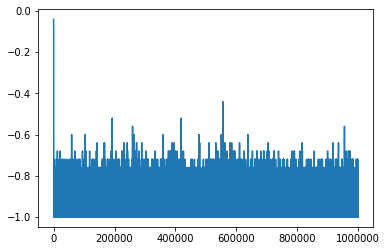

In [408]:
plt.plot(mt)

In [410]:
mS = mt[500:-1]

In [417]:
L=mS.shape[0]

In [229]:
sig=np.mean(np.std(mS.reshape(-1, 95), axis=1))

In [230]:
sig

0.04045814291203961

## Bloc sizes

In [446]:
mS

array([-0.88, -0.88, -0.84, ..., -1.  , -1.  , -1.  ])

In [213]:
list_div=[95, 100, 125, 190, 250, 380, 475, 500, 950, 1900, 2375, 4750]

In [413]:
L

(999500,)

In [419]:
d=10
mS.reshape(np.int64(L/d), d)

array([[-0.88, -0.88, -0.84, ..., -0.84, -0.84, -0.84],
       [-0.88, -0.88, -1.  , ..., -0.96, -1.  , -1.  ],
       [-1.  , -1.  , -1.  , ..., -0.96, -0.96, -0.96],
       ...,
       [-0.92, -0.92, -0.92, ..., -0.88, -0.88, -0.88],
       [-0.96, -0.92, -0.96, ..., -0.96, -1.  , -1.  ],
       [-1.  , -1.  , -0.96, ..., -1.  , -1.  , -1.  ]])

In [ ]:
sns.distplot()

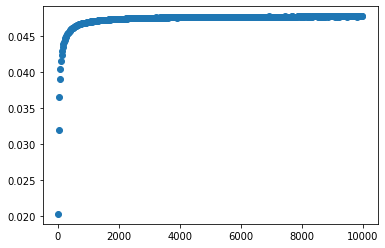

In [420]:
plt.plot(np.arange(10, 10000, 20), [np.mean(np.std(mS[:np.int64(L/d)*d].reshape(np.int64(L/d), d), axis=1)) for d in np.arange(10, 10000, 20)], 'o')

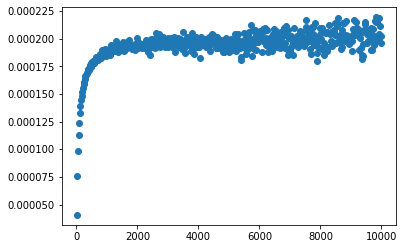

In [422]:
plt.plot(np.arange(10, 10000, 20), [np.std(np.std(mS[:np.int64(L/d)*d].reshape(np.int64(L/d), d), axis=1))/np.sqrt(np.int64(L/d)) for d in np.arange(10, 10000, 20)], 'o')

In [394]:
mS.reshape(-1, 95)

(100, 95)

In [398]:
np.std(mS.reshape(-1, 95), axis=1).shape

(100,)

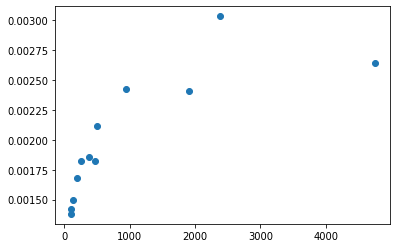

In [400]:
plt.plot(list_div, [np.std(np.std(mS.reshape(-1, d), axis=1))/np.sqrt(9500/d) for d in list_div], 'o')

95 100.0
100 95.0
125 76.0
190 50.0
250 38.0
380 25.0
475 20.0
500 19.0


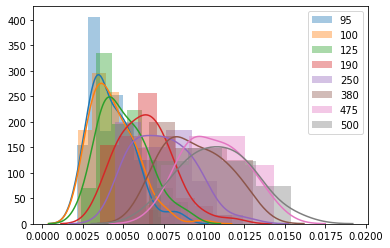

In [404]:
for d in list_div[:-4]:
    sns.distplot([np.std(mS.reshape(-1, d), axis=1)/np.sqrt(9500/d)], label=d)
    print(d, 9500/d)
plt.legend()

In [235]:
mS.reshape(-1, 190).shape

(50, 190)

In [383]:
vect_std=[np.std(np.random.choice(mS, 9500, replace=True)) for k in range(1000)]

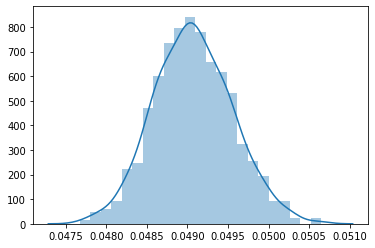

In [384]:
sns.distplot(vect_std)

In [385]:
np.std(vect_std)

0.00048236660356671833

100 9500
200 4750
500 1900
1000 950
2000 475


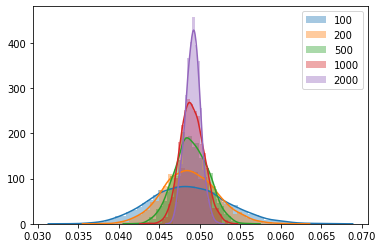

In [380]:
for bsize in [100, 200, 500, 1000, 2000]:
    vect_std=[np.std(np.random.choice(mS, bsize, replace=True)) for k in range(100)]
    print(bsize,np.int64(950000/bsize) )
    sns.distplot(vect_std, label=bsize)
plt.legend()

In [368]:
vect_std=[np.std(np.random.choice(mS, 2000, replace=True)) for k in range(100)]

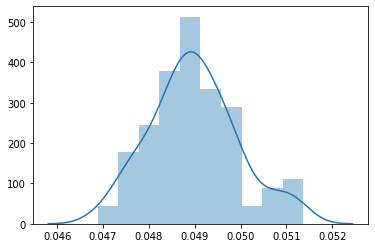

In [369]:
sns.distplot(vect_std)

In [295]:
vect_std=[np.std(np.random.choice(mS, 1000, replace=False)) for k in range(100)]

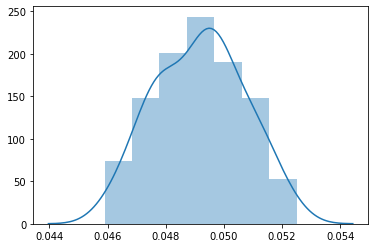

In [296]:
sns.distplot(vect_std)

In [298]:
vect_std=[np.std(np.random.choice(mS, 100, replace=False)) for k in range(100)]

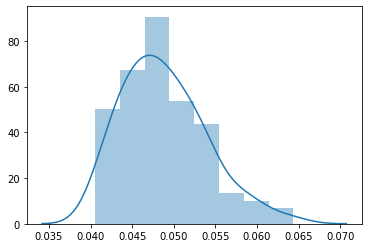

In [299]:
sns.distplot(vect_std)

In [300]:
np.mean(vect_std)

0.04880796861767187

In [301]:
bSize=np.arange(100, 1000, 50)

In [305]:
error_std=[np.std([np.std(np.random.choice(mS, s, replace=False)) for k in range(np.int64(9500/s))])/np.sqrt(np.int64(9500/s)) for s in bSize]

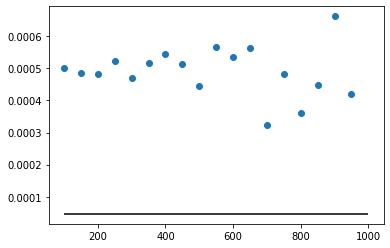

In [389]:
plt.plot(bSize, error_std, 'o')
plt.hlines(se_std, 100, 1000)

In [357]:
mt.shape

(10001,)

In [358]:
s4=np.std(mt[500:-1:100])**4
s4

7.137926123955461e-06

In [359]:
mu4=np.mean((mS-np.mean(mS))**4)

In [364]:
n=mS.shape[0]
n

9500

In [386]:
se_std=np.sqrt((1/n)*(mu4-s4*(n-3)/(n-1)))

In [388]:
se_std

4.626685297126454e-05

In [279]:
s = pd.Series(mS)
s.autocorr()

0.905185919375285

In [280]:
autoC=[s.autocorr(lag=lag) for lag in range(1, 1000)]

(0, 100)

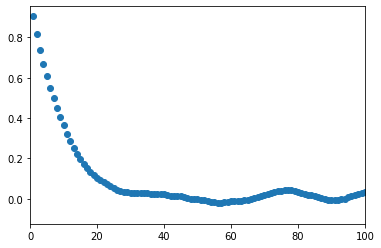

In [281]:
plt.plot(range(1, 1000), autoC, 'o')
plt.xlim(0,100)

# RNG period impact

In [434]:
def run_para_period(beta, N, tmax, period):
    dt=np.exp(-2*beta)
    list_numbers=np.random.rand(period)
    v=np.tile(list_numbers, N)
    k=0
    s=2*(np.random.rand(N)>0.5)-1
    mat_S_par=[s.copy()]
    for t in range(tmax):
        p=v[k:(k+N)]
        k+=N
        k=k%period
        s0=s.copy()
        M=np.sum(s0)
        s=s0*(2*(p>np.exp(-s0*beta*M/N)*dt)-1)
        mat_S_par.append(s.copy())
    
    mS=mt[500:-1]
    L=mS.shape[0]
    d=2000
    return(np.mean(np.mean(mat_S_par, axis=1)[500:]), \
           np.std(np.mean(mat_S_par, axis=1)[500:-1:100]), \
           np.std(np.std(mS[:np.int64(L/d)*d].reshape(np.int64(L/d), d), axis=1))/np.sqrt(np.int64(L/d)))

In [ ]:
dict_m0_per=[]
dict_std0_per=[]
dict_errstd_per=[]
list_per=np.int64(np.logspace(2, 7, 15))
list_per=[n_primes(1, p)[0] for p in list_per]

#list_per=50*np.int64(np.logspace(0, 6, 15))
for per in list_per:
    m0, std0, errstd = run_para_period(beta=2, N=50, tmax=10000000, period=per)
    dict_m0_per.append(np.abs(m0))
    dict_std0_per.append(std0)
    dict_errstd_per.append(errstd)

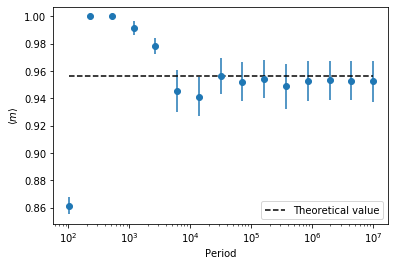

In [442]:
plt.errorbar(list_per, dict_m0_per, yerr=3*np.array(dict_std0_per)/np.sqrt(95), fmt='o')
ax = plt.gca()
ax.set_xscale('log')
plt.hlines(0.956331, list_per[0], list_per[-1], ls='--', label='Theoretical value')
plt.xlabel('Period')
plt.ylabel(r'$\langle m \rangle$')
plt.legend(loc=4)
#plt.ylim(0.93,0.97)

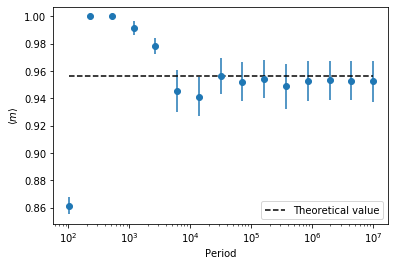

In [442]:
plt.errorbar(list_per, dict_m0_per, yerr=3*np.array(dict_std0_per)/np.sqrt(95), fmt='o')
ax = plt.gca()
ax.set_xscale('log')
plt.hlines(0.956331, list_per[0], list_per[-1], ls='--', label='Theoretical value')
plt.xlabel('Period')
plt.ylabel(r'$\langle m \rangle$')
plt.legend(loc=4)
#plt.ylim(0.93,0.97)

In [447]:
list_per

[101,
 227,
 521,
 1181,
 2683,
 6113,
 13901,
 31627,
 71971,
 163789,
 372763,
 848359,
 1930729,
 4393979,
 10000019]

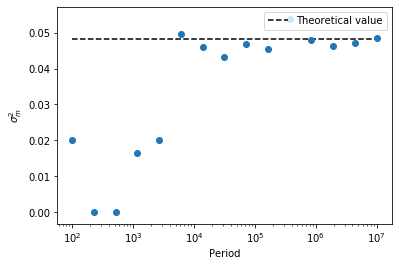

In [443]:
plt.errorbar(list_per, dict_std0_per, yerr=[3*r for r in dict_errstd_per], fmt='o')
plt.hlines(0.0483053,list_per[0], list_per[-1], ls='--', label='Theoretical value')
ax = plt.gca()
ax.set_xscale('log')
plt.xlabel('Period')
plt.ylabel(r'$\sigma_m^2$')
plt.legend(loc=1)

In [448]:
beta, N, tmax, period = 2, 50, 1000000, 372763
dt=np.exp(-2*beta)
list_numbers=np.random.rand(period)
v=np.tile(list_numbers, N)
k=0
s=2*(np.random.rand(N)>0.5)-1
mat_S_par=[s.copy()]
for t in range(tmax):
    p=v[k:(k+N)]
    k+=N
    k=k%period
    s0=s.copy()
    M=np.sum(s0)
    s=s0*(2*(p>np.exp(-s0*beta*M/N)*dt)-1)
    mat_S_par.append(s.copy())

mS=mt[500:-1]
L=mS.shape[0]

In [451]:
np.unique(mS)

array([-1.  , -0.96, -0.92, -0.88, -0.84, -0.8 , -0.76, -0.72, -0.68,
       -0.64, -0.6 , -0.56, -0.52, -0.48, -0.44])

In [453]:
np.std(mS[::100])

0.04758369765192864

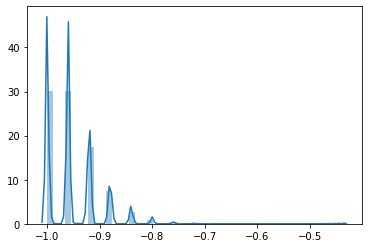

In [449]:
sns.distplot(mS)

# Seq update

In [14]:
def spreading_par(alpha,N, tmax):
    x=np.array([0 for n in range(N)])
    mat_X_par=[x.copy()]
    for t in range(tmax):
        p=np.random.rand(N)
        x0=x.copy()
        x=x0+1*(p<alpha)
        mat_X_par.append(x.copy())
    return(np.array(mat_X_par))

In [15]:
def spreading_seq(alpha, N, tmax):
    x=np.array([0 for n in range(N)])
    mat_X_seq=[x.copy()]
    for t in range(tmax):
        p=np.random.choice(N,N, replace=True)[(np.random.rand(N)<alpha)]
        e, nb = np.unique(p,  return_counts=True)
        x[e]+=nb
        mat_X_seq.append(x.copy())
    return(np.array(mat_X_seq))

In [16]:
alpha=0.3

In [17]:
N=10000

In [18]:
tmax=1000

In [19]:
mat_X_seq=spreading_seq(alpha, N, tmax)
mat_X_par=spreading_par(alpha, N, tmax)

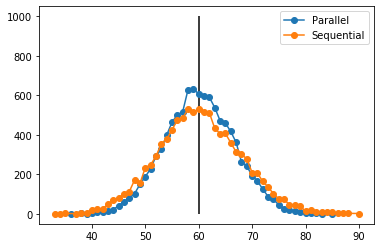

In [20]:
t=200

e, nb = np.unique(mat_X_par[t,:],  return_counts=True)
plt.plot(e, nb, 'o-', label='Parallel')

e, nb = np.unique(mat_X_seq[t,:],  return_counts=True)
plt.plot(e, nb, 'o-', label='Sequential')

plt.vlines(alpha*t, 0, 1000)

plt.legend()

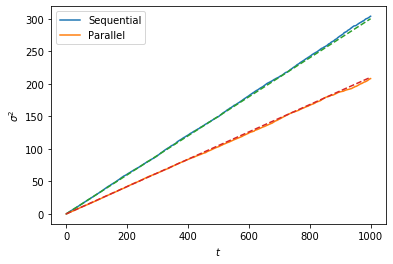

In [21]:
plt.plot(np.std(mat_X_seq, axis=1)**2, label='Sequential')
plt.plot(np.std(mat_X_par, axis=1)**2, label='Parallel')
plt.legend()

plt.xlabel(r'$t$')
plt.ylabel(r'$\sigma^2$')

u = np.linspace(0,tmax, 100)
plt.plot(u, (alpha)*u, '--')
plt.plot(u, alpha*(1-alpha)*u, '--')